# Applications of Empirical Modeling

In our last notebook, we learned how to:

1. do an automatic curve fit of *any mathematical function* to data and find the best-fit curve parameters.
2. use the model to answer questions and make predictions.
3. be wary of making predictions since the model may not fit data outside the range used for the model. (For example, a model based on "past" data may not fit "future" data.)

In this notebook, we will:

1. practice this technique to various data sets.
2. apply a curve fit to a smaller range of data.
3. modify a model.

In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used for curve fitting

# Part 1: Practice

## Exercise 1 - Vostok Ice Core

This exercise comes from [The Physics Hypertextbook](https://physics.info/linear-regression/practice.shtml). Data is from the [Vostok - Isotope and Gas Data and Temperature Reconstruction](https://www.ncdc.noaa.gov/paleo-search/study/2453) by Petit, et. al. (1999).

    Petit, J.R., J. Jouzel, D. Raynaud, N.I. Barkov, J.M. Barnola, I. Basile, M. Bender, J. Chappellaz, J. Davis, G. Delaygue, M. Delmotte, V.M. Kotlyakov, M. Legrand, V. Lipenkov, C. Lorius, L. Pépin, C. Ritz, E. Saltzman, and M. Stievenard. 1999. Climate and atmospheric history of the past 420,000 years from the Vostok Ice Core, Antarctica. Nature 399:429-436.
    
From a deep ice core sampled in Antarctica, surface temperature, carbon dioxide, and dust could be measured as a function of time in the past. While other measurements were made as well (see the above reference), we will look at temperature and carbon dioxide. This [data set](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-05-applications/vostok.txt) includes the columns:

1. Age of air in years before present.
2. Temperature anomaly (difference in temperature from the present) in degrees celsius.
3. Carbon dioxide concentration in parts per million.


In [2]:
# read the data file
df = pd.read_csv('vostok.txt', sep='\t')
df.head()

,Age of air (ybp),Temperature anomaly (deg. C),Carbon dioxide concentration (ppm)
0,2342,-1.21,284.700000
1,2374,-1.44,284.303333
2,2418,-0.73,283.906667
3,2460,-0.63,283.510000
4,2501,0.30,283.113333


Here is a graph of temperature anomaly vs. carbon dioxide concentration.

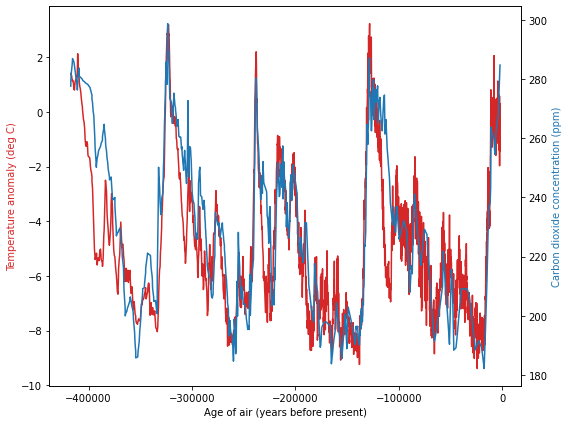

In [4]:
# define arrays for the data
xdata = -df['Age of air (ybp)'] #multiply by -1
ydata1 = df['Temperature anomaly (deg. C)']
ydata2 = df['Carbon dioxide concentration (ppm)']

fig, ax1 = plt.subplots(figsize=(8,6))

fig.title=('Temperature anomaly and carbon dioxide concentration as a function of time')
color = 'tab:red'
ax1.set_xlabel('Age of air (years before present)')

ax1.set_ylabel("Temperature anomaly (deg C)", color=color)
ax1.plot(xdata, ydata1, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # create a second axis that shares attributes of the first axis

color = 'tab:blue'
ax2.set_ylabel('Carbon dioxide concentration (ppm)', color=color)
ax2.plot(xdata, ydata2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

It seems that temperature anomaly and carbon dioxide concentration might be related. Plot temperature anomaly vs. carbon dioxide concentration.

The data seems linear, so let's do a linear fit of the form $y=ax + b$. To verify your fit, you should find best-fit parameters to be:

$a=0.0908$

$b=-25.2349$

Here's [more recent data for carbon dioxide concentration](https://www.eea.europa.eu/data-and-maps/daviz/atmospheric-concentration-of-carbon-dioxide-5). You will need to change the "pollutant" to carbon dioxide (CO<sub>2</sub>).

Also, here's [more recent data for temperature anomaly](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt). Note the column for annual mean (Jan. - Dec.) and that the unit is 0.01 degrees celsius. Thus, divide by 100 to get degrees celsius.

Use your model and/or the data to answer the following questions:

1. What is the unit of the constant $a$?

2. What is the unit of the constant $b$?

3. How many years ago was the most recent measurement of temperature anomaly and carbon dioxide concentration from the Vostok ice core?

4. In 1981, the carbon dioxide concentration was 340 ppm. What does your model predict would be the temperature anomaly in 1981 and what is the measured temperature anomaly in 1981?

5. In 2018, the carbon dioxide concentration was 408 ppm. What does your model predict would be the temperature anomaly in 2018 and what is the measured temperature anomaly in 2018?

6. Give a reason why the model may not be able to closely predice recent temperature anomalies?

7. Just because the model may not predict recent temperature anomalies, should we completely ignore the relationship between carbon dioxide concentration and global temperature anomaly and not worry at all about the increase in global carbon emissions?

## Exercise 2 - Transmission of Light by Glass: What should you do if  `curve_fit` fails?

Glass transmits visible light very well. But it blocks most infrared and ultraviolet light. Data for the transmission of light vs wavelength for a particular glass is in the file [transmission-glass.txt](transmission-glass.txt). ([source](http://nvlpubs.nist.gov/nistpubs/jres/38/jresv38n6p601_A1b.pdf))

Try to fit a Gaussian model to the data using:

$$y=ae^{\left(-\frac{1}{2}\left(\frac{x-b}{c}\right)^2\right)}$$

and try to find the best-fit parameters `a`, `b`, and `c`. You will notice that `curve_fit()` fails. 

The `curve_fit()` function adjusts the fit parameters until it minimizes the sum of the squares of the residuals. It starts with the initial guesses for the parameters listed in the line:

```python
guess=[1,1,1]
```

Note that there is a value for each parameter. So in this case, the initial guesses are $a=1$, $b=1$, and $c=1$. But the `curve_fit()` function fails if the initial guesses are far from the best-fit values. When this happens, change the initial guesses. You will have to make them much larger or smaller, and understanding how the parameters affects the function is important for determining a reasonable guess.

In this example, the parameter `a` is the peak of the gaussian which is close to 100. The parameter `b` is the mean which is around 530. And `c` is related to the width of the peak (or variance) which is around 100. Try using these initial values.

Adjust your `guess` for the fit parameters, and find the best-fit parameters `a`, `b`, and `c`.

## Exercise 3 - Kepler's Second Law

Kepler found a relationship between the period of a planet's orbit (in Earth years) and the semi-major axis (kinda like the radius, for a circular orbit) of the planet's orbit (in astronomical units, AU; 1 AU is the semi-major axis of Earth's orbit). Data for the 8 planets is in the file [planets.txt](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-05-applications/planets.txt).

1. Plot the period vs. semimajor axis of the planet's orbit.
2. Fit a power law: 
  $$y = Ax^n$$
  and find the best-fit parameters.
3. There are [five dwarf planets](https://en.wikipedia.org/wiki/Dwarf_planet). 
  1. Use your model to **predict** the period of each of the dwarf planets' orbits using the semimajor axis of their orbits.
  2. Compare your prediction to the actual period of each dwarf planet. Make a table (in Markdown) of your prediction for the period and the actual period of the dwarf planets.

## Allometry

